# EXPLORATORY DATA ANALYSIS OF INDIAN CUISINE

### **Importing Libraries**

In [31]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

### **Importing Dataset**

In [32]:
df = pd.read_csv('indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [33]:
df  = df.replace(-1,np.nan)
df  = df.replace('-1',np.nan)

In [34]:
df.shape

(255, 9)

### **Veg vs Non-veg Food**

In [35]:
diet_df = df.diet.value_counts().reset_index()
diet_df.columns = ['diet','count']
fig = px.pie(diet_df, values = 'count', names = 'diet', title = 'Veg vs Non Veg Food')
fig.show()

**Observation :** Vegetarian dishes are more than non-vegeterian dishes 

### **No. of dishes based on regions**

In [36]:
dish_df = df.region.value_counts().reset_index()
dish_df.columns = ['region','count']
fig = px.bar(dish_df, x = 'region', y = 'count', title='No. of dishes based on regions')
fig.show()

**Observation :** Maximum dishes of this dataset comes from the western part of India

### **State-wise distribution of Indian Sweets**

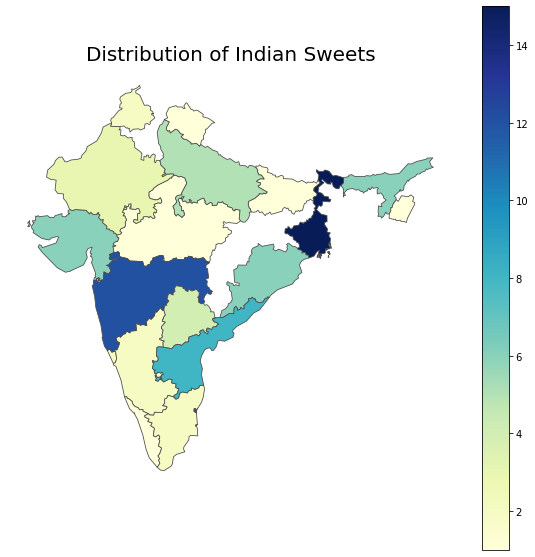

In [37]:
map_df = gpd.read_file('Maps_with_python-master\india-polygon.shp')
desserts = df[df['course'] == 'dessert']
des_df = desserts.state.value_counts().reset_index()
des_df.columns = ['state','count']
merged = map_df.set_index('st_nm').join(des_df.set_index('state'))
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Distribution of Indian Sweets', fontdict={'fontsize': '20', 'fontweight' : '10'})
fig = merged.plot(column='count',cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.3',legend=True)

**Observation :** Most no. of sweets come from the state of 'West Bengal'.

### **No. of dishes based on courses of meal**

In [38]:
courses_df = df.course.value_counts().reset_index()
courses_df.columns = ['course','count']
fig = px.bar(courses_df, x = 'course', y = 'count', title='No. of dishes based on courses of meal')
fig.show()

**Observation :** Main course is the most preferred course of all.

### **List of Indian dishes that are sweet in flavor but not desserts**

In [39]:
sweet_df = df[df['flavor_profile']=='sweet']
sweet_df = sweet_df[sweet_df['course']!='dessert']
print(sweet_df.name)

46         Obbattu holige
85           Dal makhani 
243    Mishti Chholar Dal
Name: name, dtype: object


### **Average cooking time of main course, dessert & snacks**

In [40]:
main_course = df[df['course']=='main course']
main_course_avg = (main_course['cook_time'].sum()) / len(main_course)
print('Average cooking time of main course is: {0} minutes'. format(round(main_course_avg)))

snacks = df[df['course']=='snack']
snacks_avg = (snacks['cook_time'].sum()) / len(snacks)
print('Average cooking time of snacks is: {0} minutes'. format(round(snacks_avg)))

desserts = df[df['course']=='dessert']
desserts_avg = (desserts['cook_time'].sum()) / len(desserts)
print('Average cooking time of dessert is: {0} minutes'. format(round(desserts_avg)))

Average cooking time of main course is: 30 minutes
Average cooking time of snacks is: 29 minutes
Average cooking time of dessert is: 44 minutes


### **Top 10 dishes with shortest cooking time**

### **Propertion of flavour profile w.r.t. region**

In [41]:
flavours = ['sweet','spicy','sour','bitter']
df['region_count'] = df.region.value_counts()
fig = px.bar(df, x="region", y=['sweet','spicy','sour','bitter'],
             color="flavor_profile",
             barmode = 'group')
fig.show()

ValueError: All arguments should have the same length. The length of argument `y` is 4, whereas the length of  previously-processed arguments ['region'] is 255